In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import cv2

# パラメータの読み込み

In [3]:
# 公式では、ArgumentParserを使用しているが、今回は必要は無い
#import argparse

#parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
#parser.add_argument('--face_cascade', help='Path to face cascade.', default='data/haarcascades/haarcascade_frontalface_alt.xml')
#parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
#parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
#args = parser.parse_args()

#face_cascade_name = args.face_cascade
#eyes_cascade_name = args.eyes_cascade

In [4]:
face_cascade_name = 'data/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'data/haarcascade_eye_tree_eyeglasses.xml'

# 分類器を取得

## サンプルのパスを追加

In [5]:
import os

homedir = os.path.expanduser('~')
cv2dir = '.local/lib/python3.7/site-packages/cv2/'
cv2path = os.path.join(homedir, cv2dir)

In [6]:
cv2.samples.addSamplesDataSearchPath(cv2path)

In [7]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

## 分類器の取得

In [8]:
face_cascade.load(cv2.samples.findFile(face_cascade_name))
eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name))

[ WARN:0] global /tmp/pip-req-build-l1r0y34w/opencv/modules/core/src/utils/samples.cpp (61) findFile cv::samples::findFile('data/haarcascade_frontalface_alt.xml') => '/home/jupyter/.local/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml'
[ WARN:0] global /tmp/pip-req-build-l1r0y34w/opencv/modules/core/src/utils/samples.cpp (61) findFile cv::samples::findFile('data/haarcascade_eye_tree_eyeglasses.xml') => '/home/jupyter/.local/lib/python3.7/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml'


True

# 画像のダウンロード

In [9]:
urls = [
    'http://kf-camera.com/wp-content/uploads/2016/01/20160112_8.jpg',
    'https://pictkan.com/uploads/converted/15/06/15/2380770682-cycling-664753-EkN-1280x853-MM-100.jpg']

In [10]:
import subprocess

# ホームディレクトリの下に'img'ディレクトリ作成
imgdir = os.path.join(os.path.expanduser('~'), 'img')
os.makedirs(imgdir, exist_ok=True)

for url in urls:
    fname = url[url.rfind('/')+1:]
    imgpath = os.path.join(imgdir, fname)
    
    # 画像ファイルがなければダウンロードする。
    if not os.path.isfile(imgpath):
        result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, cwd=imgdir)

# 画像の読み込み

In [11]:
imgpath = os.path.join(os.path.expanduser('~'), 'img', '20160112_8.jpg')

In [12]:
img = cv2.imread(imgpath)

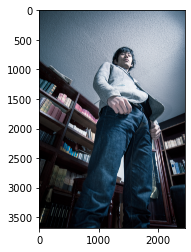

In [13]:
# cv2.imshowはJupyterNotebookでは使えない
#cv2.imshow("image", image)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

# 画像をグレースケールに変換

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

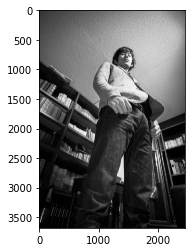

In [15]:
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)) 

# グレー画像のヒストグラムを平坦化

In [16]:
img_gray = cv2.equalizeHist(img_gray)

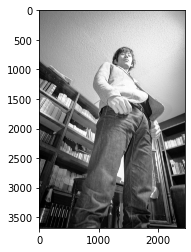

In [17]:
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)) 

# 顔検出

In [18]:
faces = face_cascade.detectMultiScale(img_gray)

error: OpenCV(4.5.3) /tmp/pip-req-build-l1r0y34w/opencv/modules/core/src/alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 527734272 bytes in function 'OutOfMemoryError'


In [ ]:
for face in facs:
    xf, yf, wf, hf = face
    cv2.rectangle(img, (xf, yf), (xf+wf, yf+hf), color=(0,0,255))
    
    face_img = img_gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(face_img)
    for eye in eyes:
        xe, ye, we, he = eye
        eye_center = (xf + xe + we//2, yf + ye + he//2)
        cv2.ellipse(img, eye_center, axes=(we//2, he//2), 
                    angle=0, startAngle=0, endAngle=360, 
                    color=(255, 255, 255) )

In [ ]:
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)) 